In [15]:
import itertools

import numpy as np
from qutip import *
# some_file.py
# import sys
from qudit import *
# import scipy
import time
import IPython.display as disp
# from tqdm.notebook import tqdm
import multiprocess as mp
import matplotlib.pyplot as plt
from continuous import *
from discrete_simulation import *
from dataclasses import dataclass

# sys.path.insert(1, 'C:\\Users\\shoha\\Documents\\GitHub\\grimsmo-paper-simulations')

# from measurements import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


parameters

In [16]:
@dataclass
class ContSimResults:
    N: int
    d: int
    m_i: int
    m_c: int
    alpha
    simulationObject: ContinuousSimulation
    fid_prob_list: list
    gamma_list

    def get_fid_array(self):
        return [tup[0] for tup in self.fid_prob_list]
    
    def get_prob_array(self):
        return [tup[1] for tup in fid_prob_list]



In [17]:
d = 16
m_i = 8
fidelity_cut = 0
gamma_list = np.logspace(-3,-1,15)
gamma_ratio = 1
alpha=10

First Discrete part

In [8]:
m_c = 4

process_count = 20  # mp.cpu_count()-9

simulation16 = DiscreteSimulation(d, m_i,m_c, alpha=alpha )

with mp.Pool(process_count) as pool:
    fid_prob_list = pool.starmap(simulation16.average_fidelity, zip(list(gamma_list),list(gamma_ratio*gamma_list), [fidelity_cut] * len(gamma_list)))
fid_list164 = [tup[0] for tup in fid_prob_list]
prob_list164 = [tup[1] for tup in fid_prob_list]

m_c = 8

process_count = 20  # mp.cpu_count()-9

simulation16 = DiscreteSimulation(d, m_i,m_c, alpha=alpha )

with mp.Pool(process_count) as pool:
    fid_prob_list = pool.starmap(simulation16.average_fidelity, zip(list(gamma_list),list(gamma_ratio*gamma_list), [fidelity_cut] * len(gamma_list)))
fid_list168 = [tup[0] for tup in fid_prob_list]
prob_list168 = [tup[1] for tup in fid_prob_list]

Now continuous part

In [ ]:
m_c = 4
n = 7
N = 2**n

process_count = 20  # mp.cpu_count()-9

sim = ContinuousSimulation(N, d, m_i, m_c, alpha=alpha, decode_res=16)

with mp.Pool(process_count) as pool:
    fid_prob_list = pool.starmap(sim.average_fidelity, zip(list(gamma_list),list(gamma_ratio*gamma_list), [fidelity_cut] * len(gamma_list)))

fid_list_con4 = [tup[0] for tup in fid_prob_list]
prob_list_con4 = [tup[1] for tup in fid_prob_list]

In [ ]:
simRes4 = ContSimResults(N,d,m_i,m_c,alpha,sim, fid_prob_list, gamma_list)

import dill
from datetime import date

with open(f'simRes{m_c=},{alpha=},{date.today()}.pkl', 'wb') as file:
    dill.dump(res_list, file)

In [10]:
m_c = 8
n = 7
N = 2**n

process_count = 20  # mp.cpu_count()-9

sim = ContinuousSimulation(N, d, m_i, m_c, alpha=alpha, decode_res=8)

with mp.Pool(process_count) as pool:
    fid_prob_list = pool.starmap(sim.average_fidelity, zip(list(gamma_list),list(gamma_ratio*gamma_list), [fidelity_cut] * len(gamma_list)))
fid_list_con8 = [tup[0] for tup in fid_prob_list]
prob_list_con8 = [tup[1] for tup in fid_prob_list]

C:\Program Files\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, '$d=16,m_i=8, \\alpha=10 $')

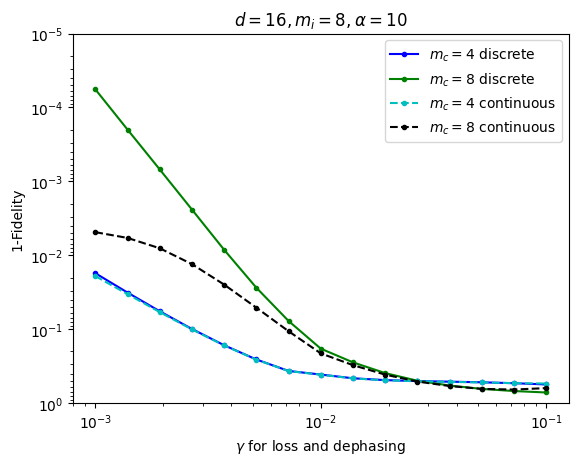

In [11]:
plt.figure(dpi=100)

plt.loglog(gamma_list,1-np.array(fid_list164), 'b.-', label="$m_c=4$ discrete")
plt.loglog(gamma_list,1-np.array(fid_list168), 'g.-', label="$m_c=8$ discrete")
plt.loglog(gamma_list,1-np.array(fid_list_con4), 'c.--', label="$m_c=4$ continuous")
plt.loglog(gamma_list,1-np.array(fid_list_con8), 'k.--', label="$m_c=8$ continuous")


# plt.title("Infidelity with trivial protocol and with our protocol. d = 16, m_i = 4, m_c=4")
plt.xlabel(f"$\\gamma$ for loss and dephasing")  # decay and 1/{gamma_ratio} 
plt.ylabel("1-Fidelity")
plt.ylim([1,1e-5])
# plt.xlim([1e-2,1e-1])
plt.legend()
plt.title(f"${d=},{m_i=}, \\alpha={alpha} $")
# plt.gca().invert_yaxis()

In [ ]:
import dill

with open('fid_list_con4.pkl', 'wb') as file:
    dill.dump(fid_list_con4, file)